In [ ]:
# !pip install requests
!pip install sodapy

import requests
from requests.auth import HTTPBasicAuth

## Understanding, Exploring and Visualizing Data
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sodapy import Socrata


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import dask.dataframe as dd


In [ ]:
# First Dataset (2010 - 2019)
# https://data.cityofnewyork.us/City-Government/Property-Valuation-and-Assessment-Data/yjxr-fw8i/about_data
api_endpoint = "https://data.cityofnewyork.us/resource/yjxr-fw8i.json"
api_key = "7cdpwsl5p8eqeg1d24xsbq64w"
api_secret = "31grq5eswi42uh3k9hu6eyjlkp3x0wb0bsyk4r9yu2jz2mr6b9"

response = requests.get(api_endpoint, auth=HTTPBasicAuth(api_key, api_secret))

limit = 1000  # Number of items per request
offset = 0    # Starting point for each request
# Total records in the file is 9845857, we are omitting 2 records
total_records = 9845855  # Total records in the dataset (adjust as needed)

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()
i =  0

# We are only taking the first 60k data
# 20022
2
while i < 200:
    i += 1
    # Use the API call to request the server for info
    response = requests.get(api_endpoint, auth=HTTPBasicAuth(api_key, api_secret),
                            params={"$limit": limit, "$offset": offset})

    # Check if the request was successful
    if response.status_code == 200:
        # Load current data into a DataFrame
        current_data = pd.DataFrame(response.json())

        # Concatenate the current data to the main DataFrame
        all_data = pd.concat([all_data, current_data], ignore_index=True)

        # Update the offset for the next request
        offset += limit
        #print(current_data)
    else:
        print(f"Failed to fetch data: {response.status_code}")
        print(response.text)
        break

# Save the DataFrame to a CSV file
all_data.to_csv('nyc_data1.csv', index=False)

# Display the shape of the DataFrame to verify the number of rows loaded
# print(all_data.shape)


df1 = all_data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   bble                         200000 non-null  object
 1   boro                         200000 non-null  object
 2   block                        200000 non-null  object
 3   lot                          200000 non-null  object
 4   owner                        191502 non-null  object
 5   bldgcl                       200000 non-null  object
 6   taxclass                     200000 non-null  object
 7   ltfront                      200000 non-null  object
 8   ltdepth                      200000 non-null  object
 9   stories                      163223 non-null  object
 10  fullval                      200000 non-null  object
 11  avland                       200000 non-null  object
 12  avtot                        200000 non-null  object
 13  exland        

In [ ]:
# Second Dataset (NEW) (2021-2023)
# https://data.cityofnewyork.us/City-Government/Property-Valuation-and-Assessment-Data-Tax-Classes/8y4t-faws/data_preview

api_endpoint = "https://data.cityofnewyork.us/resource/8y4t-faws.json"
api_key = "6iicdls0lllux5k2zh4wmcbcy"
api_secret = "nol8pwnk4foppzbxrm8vl23sgljt0mqzkxpzo0xscgbxs1zv9"

response = requests.get(api_endpoint, auth=HTTPBasicAuth(api_key, api_secret))

limit = 1000  # Number of items per request
offset = 0    # Starting point for each request
# Total records in the file is 9845857, we are omitting 2 records
total_records = 9845855  # Total records in the dataset (adjust as needed)

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()
i =  0

# We are only taking the first 60k data
# 200
while i < 200:
    i += 1
    # Use the API call to request the server for info
    response = requests.get(api_endpoint, auth=HTTPBasicAuth(api_key, api_secret),
                            params={"$limit": limit, "$offset": offset})

    # Check if the request was successful
    if response.status_code == 200:
        # Load current data into a DataFrame
        current_data = pd.DataFrame(response.json())

        # Concatenate the current data to the main DataFrame
        all_data = pd.concat([all_data, current_data], ignore_index=True)

        # Update the offset for the next request
        offset += limit
        #print(current_data)
    else:
        print(f"Failed to fetch data: {response.status_code}")
        print(response.text)
        break

# Save the DataFrame to a CSV file
all_data.to_csv('nyc_data2.csv', index=False)

# Display the shape of the DataFrame to verify the number of rows loaded
# print(all_data.shape)


df2 = all_data
df2.head()

,parid,boro,block,lot,rectype,year,secvol,pymktland,pymkttot,pyactland,...,cbntaxclass,fintaxclass,easement,reuc_ref,subident_reuc,ident,subident,roll_section,reuc_description,valref
0,3025410030,3,2541,30,1,2021,901,87000,1721000,39150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3025410033,3,2541,33,1,2021,901,106000,2562400,47700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3025410036,3,2541,36,1,2021,901,87000,1939200,39150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3025410038,3,2541,38,1,2021,901,314000,1593000,18840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3025410039,3,2541,39,1,2021,901,298000,1942000,17880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Dataset common:

Dataset1:Dataset2

2010      :    2025



---


boro : boro              (borough)

block : block            (block range by borough)

lot : lot                     (Unique number within BORO/BLOCK)

easement : easement (codes for things such as A for air rights and R for railroads)

year : year

FINTAXCLASS : taxclass

bldg_class : bldgcl      (building class)

owner : owner

street_name : staddr    (street name : street address   (is there a diff))

LOT_FRT : LTFRONT     (lot frontage : lot width)

LOT_DEP : ltdep           (lot depth)

bld_story : stories       (number of stories)


PYMKTLAND : FULLVAL                 Market Assessed Land Value

PYACTLAND : AVLAND                  Actual Assessed Land Value

PYACTTOT : AVTOT                        Actual Assessed Total Value




---


Dataset 1 Useful:


(These values are originally assessed)

PYMKTLAND             Market Assessed Land Value

PYMKTTOT                Market Assessed Total Value

PYACTLAND              Actual Assessed Land Value

PYACTTOT                 Actual Assessed Total Value

PYTAXCLASS             Property Tax Class


(These values are finally assessed)

FINMKTLAND              Final Market Assessed Land Value

FINMKTTOT                 Final Market Assessed Total Value

FINACTLAND               Final Actual Assessed Land Value

FINACTTOT                  Final Actual Assessed Total Value

FINTAXCLASS              Property Tax Class


(These values are currently assessed)

CURMKTLAND            Current Market Assessed Land Value

CURMKTTOT               Current Market Assessed Total Value

CURACTLAND             Current Actual Assessed Land Value

CURACTTOT                Current Actual Assessed Total Value


noav                           A building in progress

stcode                        street code (idk)




---



Dataset 2 Useful:

FULLVAL            Market Value

AVLAND            Actual Land Value

AVTOT               Actual Total Value


In [ ]:
# Read from CSV

df1 = pd.read_csv('nyc_data1.csv')

df2 = pd.read_csv('nyc_data2.csv')


<ipython-input-64-2e21fd54fc22>:5: DtypeWarning: Columns (0,62,66,69,115,120,122,123,124,125,126,127,128,130,131) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('nyc_data2.csv')


In [ ]:
df2['pymktland']

0          87000
1         106000
2          87000
3         314000
4         298000
           ...  
199995    212000
199996    168000
199997    148000
199998    188000
199999    238000
Name: pymktland, Length: 200000, dtype: int64

In [ ]:
# This is to combine the values we want from df1 (2010-2019) and df2 (2021-2025), we have also cut the data to 2021-2023

# This is because d1 has the years formatted like this 2010/11 when we want it as a signular year 2010
df1['year'] = df1['year'].str.slice(0, 4)

# Drop rows where the year is 2024 or 2025
df2 = df2[~df2['year'].isin([2024, 2025])]


columns_mapping = {
    'boro': 'boro',             # d2:boro -> d3:boro
    'block': 'block',           # d2:block -> d3:block
    'lot': 'lot',               # d2:lot -> d3:lot
    'easement': 'easement',     # d2:easement -> d3:easement
    'year': 'year',             # d2:year -> d3:year
    'fintaxclass': 'taxclass',  # d2:FINTAXCLASS -> d3:taxclass
    'bldg_class': 'bldgcl',     # d2:bldg_class -> d3:bldgcl
    'owner': 'owner',           # d2:owner -> d3:owner
    'street_name': 'staddr',    # d2:street_name -> d3:staddr
    'lot_frt': 'ltfront',       # d2:LOT_FRT -> d3:LTFRONT
    'lot_dep': 'ltdepth',         # d2:LOT_DEP -> d3:ltdep
    'bld_story': 'stories',     # d2:bld_story -> d3:stories
    'pymktland': 'fullval',     # d2:PYMKTLAND -> d3:FULLVAL
    'pyactland': 'avland',      # d2:PYACTLAND -> d3:AVLAND
    'pyacttot': 'avtot'         # d2:PYACTTOT -> d3:AVTOT
}


df3_columns = ['boro', 'block', 'lot', 'easement', 'year', 'taxclass', 'bldgcl',
              'owner', 'staddr', 'ltfront', 'ltdepth', 'stories', 'fullval', 'avland', 'avtot']

df3 = pd.DataFrame(columns=df3_columns)

# Select columns safely from df1_renamed and df2
# df2_renamed = df2.rename(columns={v: k for k, v in columns_mapping.items()})

# Create a new dictionary with keys and values swapped
'''
swapped_columns_mapping = {}
for original_column, new_column in columns_mapping.items():
    swapped_columns_mapping[new_column] = original_column

# Use the new dictionary to rename columns in df2
df2_renamed = df2.rename(columns=swapped_columns_mapping)
print(df2_renamed)
df2_selected = df2_renamed.reindex(columns=df3_columns)


# df1_selected = df1.reindex(columns=df3_columns)

'''
# Step 1: Filter columns in df2 that are keys in the columns_mapping
df2_filtered = df2[list(columns_mapping.keys())]

# Step 2: Rename columns in df2 according to the mapping
df2_renamed = df2_filtered.rename(columns=columns_mapping)

# Step 3: Merge or Update
# Option 1: Merge
df3_merged = pd.merge(df3, df2_renamed, on=list(columns_mapping.values()), how='outer')
print(df3_merged)
# Option 2: Update
df3.update(df2_renamed)
print(df3_merged)

        boro  block  lot easement  year taxclass bldgcl               owner  \
0          3   2541   30      NaN  2021      NaN     C1             299 LLC   
1          3   2541   33      NaN  2021      NaN     C1             293 LLC   
2          3   2541   36      NaN  2021      NaN     C1            287A LLC   
3          3   2541   38      NaN  2021      NaN     B9  JUSZCZAK, ANTONINA   
4          3   2541   39      NaN  2021      NaN     B9     SAWICKI CZESLAW   
...      ...    ...  ...      ...   ...      ...    ...                 ...   
199284     3   7820   15      NaN  2021      NaN     B1       VELEZ, LUIS A   
199285     3   7820   17      NaN  2021      NaN     B1      GEDEON GINETTE   
199286     3   7820   18      NaN  2021      NaN     B1        MARK, GERARD   
199287     3   7820   19      NaN  2021      NaN     B1         BAHL PHILIP   
199288     3   7820   21      NaN  2021      NaN     B3     BENNETT, ROBERT   

                      staddr  ltfront  ltdepth  sto

In [ ]:
df2_renamed

,boro,block,lot,easement,year,taxclass,bldgcl,owner,staddr,ltfront,ltdepth,stories,fullval,avland,avtot
0,3,2541,30,NaN,2021,NaN,C1,299 LLC,MCGUINNESS BOULEVARD,62.00,35.00,5.0,87000,39150,774450
1,3,2541,33,NaN,2021,NaN,C1,293 LLC,MCGUINNESS BOULEVARD,76.00,35.00,5.0,106000,47700,1153080
2,3,2541,36,NaN,2021,NaN,C1,287A LLC,MCGUINNESS BOULEVARD,62.00,35.00,5.0,87000,39150,872640
3,3,2541,38,NaN,2021,NaN,B9,"JUSZCZAK, ANTONINA",JAVA STREET,25.00,100.00,2.0,314000,18840,95580
4,3,2541,39,NaN,2021,NaN,B9,SAWICKI CZESLAW,JAVA STREET,25.00,100.00,3.0,298000,17880,116520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3,7820,15,NaN,2021,NaN,B1,"VELEZ, LUIS A",KINGS HIGHWAY,35.00,114.00,2.0,212000,12720,42120
199996,3,7820,17,NaN,2021,NaN,B1,GEDEON GINETTE,KINGS HIGHWAY,20.00,107.00,2.0,168000,10080,36540
199997,3,7820,18,NaN,2021,NaN,B1,"MARK, GERARD",KINGS HIGHWAY,20.00,94.33,2.0,148000,8880,36540
199998,3,7820,19,NaN,2021,NaN,B1,BAHL PHILIP,KINGS HIGHWAY,23.33,81.67,2.0,188000,11280,41880


In [ ]:
# Delete any columns that arent defined in df3_columns
df1 = df1[df3_columns]

# Concatenate df1 and df2
df3 = pd.concat([df2_renamed, df1], ignore_index=True)

In [ ]:

df3

,boro,block,lot,easement,year,taxclass,bldgcl,owner,staddr,ltfront,ltdepth,stories,fullval,avland,avtot
0,3,2541,30,NaN,2021,NaN,C1,299 LLC,MCGUINNESS BOULEVARD,62.0,35.0,5.0,87000,39150,774450
1,3,2541,33,NaN,2021,NaN,C1,293 LLC,MCGUINNESS BOULEVARD,76.0,35.0,5.0,106000,47700,1153080
2,3,2541,36,NaN,2021,NaN,C1,287A LLC,MCGUINNESS BOULEVARD,62.0,35.0,5.0,87000,39150,872640
3,3,2541,38,NaN,2021,NaN,B9,"JUSZCZAK, ANTONINA",JAVA STREET,25.0,100.0,2.0,314000,18840,95580
4,3,2541,39,NaN,2021,NaN,B9,SAWICKI CZESLAW,JAVA STREET,25.0,100.0,3.0,298000,17880,116520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399284,2,3432,1941,NaN,2018,1A,R3,"ALEMAN, CYNTHIA",116 SURF DRIVE,0.0,0.0,3.0,422839,706,18814
399285,2,3332,42,NaN,2018,2,C7,3105 DECATUR ASSOCIAT,3105 DECATUR AVENUE,125.0,119.0,5.0,3346000,79200,1505700
399286,2,3385,38,NaN,2018,1,B1,"HOGAN, RUTH",345 EAST 236 STREET,25.0,100.0,2.0,632000,13020,37920
399287,2,2963,6,NaN,2018,2B,C1,HOUSING WORKS LYMAN P,1412 PROSPECT AVENUE,28.0,162.0,4.0,1174000,1362,76125


In [ ]:
# drop data without a full valuation
df3['year'] = df3['year'].astype(int)
df4 = df3.dropna(subset=['fullval'])


# df4 = df3.dropna(subset=['staddr'])


# Drop rows where FULLVAL is 0
df4 = df4[df4['fullval'] != 0]

,boro,block,lot,easement,year,taxclass,bldgcl,owner,staddr,ltfront,ltdepth,stories,fullval,avland,avtot
0,3,2541,30,NaN,2021,NaN,C1,299 LLC,MCGUINNESS BOULEVARD,62.0,35.0,5.0,87000,39150,774450
1,3,2541,33,NaN,2021,NaN,C1,293 LLC,MCGUINNESS BOULEVARD,76.0,35.0,5.0,106000,47700,1153080
2,3,2541,36,NaN,2021,NaN,C1,287A LLC,MCGUINNESS BOULEVARD,62.0,35.0,5.0,87000,39150,872640
3,3,2541,38,NaN,2021,NaN,B9,"JUSZCZAK, ANTONINA",JAVA STREET,25.0,100.0,2.0,314000,18840,95580
4,3,2541,39,NaN,2021,NaN,B9,SAWICKI CZESLAW,JAVA STREET,25.0,100.0,3.0,298000,17880,116520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399284,2,3432,1941,NaN,2018,1A,R3,"ALEMAN, CYNTHIA",116 SURF DRIVE,0.0,0.0,3.0,422839,706,18814
399285,2,3332,42,NaN,2018,2,C7,3105 DECATUR ASSOCIAT,3105 DECATUR AVENUE,125.0,119.0,5.0,3346000,79200,1505700
399286,2,3385,38,NaN,2018,1,B1,"HOGAN, RUTH",345 EAST 236 STREET,25.0,100.0,2.0,632000,13020,37920
399287,2,2963,6,NaN,2018,2B,C1,HOUSING WORKS LYMAN P,1412 PROSPECT AVENUE,28.0,162.0,4.0,1174000,1362,76125


In [ ]:
if 'staddr' in df3.columns:
    # Drop rows with missing values in 'staddr'
    df4 = df3.dropna(subset=['staddr'])
    df4 = df3.dropna(subset=['fullval'])

    # Drop rows where FULLVAL is 0
    df4 = df4[df4['fullval'] != 0]
else:
    print("'staddr' column not found in df3")

In [ ]:
df4

,boro,block,lot,easement,year,taxclass,bldgcl,owner,staddr,ltfront,ltdepth,stories,fullval,avland,avtot
0,3,2541,30,NaN,2021,NaN,C1,299 LLC,MCGUINNESS BOULEVARD,62.0,35.0,5.0,87000,39150,774450
1,3,2541,33,NaN,2021,NaN,C1,293 LLC,MCGUINNESS BOULEVARD,76.0,35.0,5.0,106000,47700,1153080
2,3,2541,36,NaN,2021,NaN,C1,287A LLC,MCGUINNESS BOULEVARD,62.0,35.0,5.0,87000,39150,872640
3,3,2541,38,NaN,2021,NaN,B9,"JUSZCZAK, ANTONINA",JAVA STREET,25.0,100.0,2.0,314000,18840,95580
4,3,2541,39,NaN,2021,NaN,B9,SAWICKI CZESLAW,JAVA STREET,25.0,100.0,3.0,298000,17880,116520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399284,2,3432,1941,NaN,2018,1A,R3,"ALEMAN, CYNTHIA",116 SURF DRIVE,0.0,0.0,3.0,422839,706,18814
399285,2,3332,42,NaN,2018,2,C7,3105 DECATUR ASSOCIAT,3105 DECATUR AVENUE,125.0,119.0,5.0,3346000,79200,1505700
399286,2,3385,38,NaN,2018,1,B1,"HOGAN, RUTH",345 EAST 236 STREET,25.0,100.0,2.0,632000,13020,37920
399287,2,2963,6,NaN,2018,2B,C1,HOUSING WORKS LYMAN P,1412 PROSPECT AVENUE,28.0,162.0,4.0,1174000,1362,76125


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
'''
# this to have address in a form comp can understand
feature_transformer = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['staddr'])
], remainder='passthrough')


pipeline = Pipeline([
    ('transformer', feature_transformer),
    ('scaler', StandardScaler(with_mean=False))  # Set with_mean to False
])

# Split dataset
X = df4[['year', 'staddr']]
y = df4['fullval']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply transformations using the pipeline
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
'''

"\n# this to have address in a form comp can understand\nfeature_transformer = ColumnTransformer(transformers=[\n    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['staddr'])\n], remainder='passthrough')\n\n\npipeline = Pipeline([\n    ('transformer', feature_transformer),\n    ('scaler', StandardScaler(with_mean=False))  # Set with_mean to False\n])\n\n# Split dataset\nX = df4[['year', 'staddr']]\ny = df4['fullval']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)\n\n# Apply transformations using the pipeline\nX_train = pipeline.fit_transform(X_train)\nX_test = pipeline.transform(X_test)\n"

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define the regressors to use
regressors = {
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100),
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor': SVR()
}

In [ ]:
df4

,boro,block,lot,easement,year,taxclass,bldgcl,owner,staddr,ltfront,ltdepth,stories,fullval,avland,avtot
0,3,2541,30,NaN,2021,NaN,C1,299 LLC,MCGUINNESS BOULEVARD,62.0,35.0,5.0,87000,39150,774450
1,3,2541,33,NaN,2021,NaN,C1,293 LLC,MCGUINNESS BOULEVARD,76.0,35.0,5.0,106000,47700,1153080
2,3,2541,36,NaN,2021,NaN,C1,287A LLC,MCGUINNESS BOULEVARD,62.0,35.0,5.0,87000,39150,872640
3,3,2541,38,NaN,2021,NaN,B9,"JUSZCZAK, ANTONINA",JAVA STREET,25.0,100.0,2.0,314000,18840,95580
4,3,2541,39,NaN,2021,NaN,B9,SAWICKI CZESLAW,JAVA STREET,25.0,100.0,3.0,298000,17880,116520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399284,2,3432,1941,NaN,2018,1A,R3,"ALEMAN, CYNTHIA",116 SURF DRIVE,0.0,0.0,3.0,422839,706,18814
399285,2,3332,42,NaN,2018,2,C7,3105 DECATUR ASSOCIAT,3105 DECATUR AVENUE,125.0,119.0,5.0,3346000,79200,1505700
399286,2,3385,38,NaN,2018,1,B1,"HOGAN, RUTH",345 EAST 236 STREET,25.0,100.0,2.0,632000,13020,37920
399287,2,2963,6,NaN,2018,2B,C1,HOUSING WORKS LYMAN P,1412 PROSPECT AVENUE,28.0,162.0,4.0,1174000,1362,76125


In [ ]:
# Because each borough is likely to exhibit different growth charatesitscs I have deceided to split the dataset by borough

# Split the dataframe based on the 'boro' column
Manhattandf = df4[df4['boro'] == 1]
Bronxdf = df4[df4['boro'] == 2]
Brooklyndf = df4[df4['boro'] == 3]
Queensdf = df4[df4['boro'] == 4]
StatenIslanddf = df4[df4['boro'] == 5]


In [ ]:
Manhattandf

,boro,block,lot,easement,year,taxclass,bldgcl,owner,staddr,ltfront,ltdepth,stories,fullval,avland,avtot
6524,1,1841,13,NaN,2021,NaN,B3,GARLAND E WOOD,WEST 105 STREET,17.58,75.00,3.0,1107000,66420,175440
8244,1,1841,14,NaN,2021,NaN,A5,"NOYES, ELIZABETH",MANHATTAN AVENUE,16.67,75.00,3.0,226000,13560,219780
8323,1,1841,15,NaN,2021,NaN,A4,"GOINGS, MATTIE M",MANHATTAN AVENUE,16.33,86.83,3.0,1179000,70740,227580
8477,1,1841,16,NaN,2021,NaN,A9,"GLENN GULLICKSON, TIMOTHY",MANHATTAN AVENUE,16.33,86.83,3.0,1782000,106920,256260
9218,1,1841,17,NaN,2021,NaN,B9,RAYMOND RECHT,MANHATTAN AVENUE,17.00,70.00,3.0,1611000,96660,219300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398253,1,2225,30,NaN,2018,2,C1,M & N MANAGEMENT CORP,168 SHERMAN AVENUE,50.00,150.00,5.0,1584000,59850,712800
398254,1,2215,356,NaN,2018,1,B1,PONDICHI CONSTANTIN,10 VAN CORLEAR PLACE,28.00,133.00,2.0,655000,23674,34006
398264,1,2202,9,NaN,2018,2,D4,420 WEST 206 STREET O,416 WEST 206 STREET,200.00,99.00,6.0,6011000,193950,2704950
398265,1,2164,44,NaN,2018,2,C7,175 REALTY ASSOCIATES,4316 BROADWAY,37.00,103.00,5.0,2122000,59400,954900


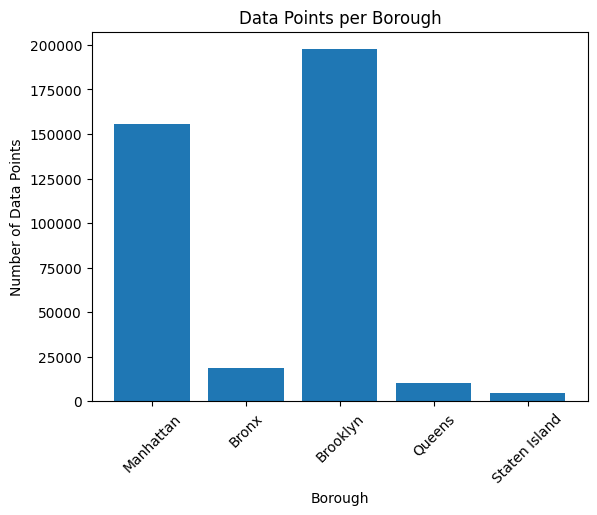


 {'Manhattan': (2010, 2021), 'Bronx': (2010, 2021), 'Brooklyn': (2010, 2022), 'Queens': (2010, 2018), 'Staten Island': (2010, 2018)}


In [ ]:
# create a dictionary with the borough names and the number of rows in each dataframe
borough_counts = {
    'Manhattan': len(Manhattandf),
    'Bronx': len(Bronxdf),
    'Brooklyn': len(Brooklyndf),
    'Queens': len(Queensdf),
    'Staten Island': len(StatenIslanddf)
}

# plot this information using a bar graph
plt.bar(borough_counts.keys(), borough_counts.values())
plt.xlabel('Borough')
plt.ylabel('Number of Data Points')
plt.title('Data Points per Borough')
plt.xticks(rotation=45)
plt.show()


# date ranges in each dataframe
date_ranges = {
    'Manhattan': (Manhattandf['year'].min(), Manhattandf['year'].max()),
    'Bronx': (Bronxdf['year'].min(), Bronxdf['year'].max()),
    'Brooklyn': (Brooklyndf['year'].min(), Brooklyndf['year'].max()),
    'Queens': (Queensdf['year'].min(), Queensdf['year'].max()),
    'Staten Island': (StatenIslanddf['year'].min(), StatenIslanddf['year'].max())
}

print("\n", date_ranges)



In [ ]:
Manhattandf

,boro,block,lot,easement,year,taxclass,bldgcl,owner,staddr,ltfront,ltdepth,stories,fullval,avland,avtot
6524,1,1841,13,NaN,2021,NaN,B3,GARLAND E WOOD,WEST 105 STREET,17.58,75.00,3.0,1107000,66420,175440
8244,1,1841,14,NaN,2021,NaN,A5,"NOYES, ELIZABETH",MANHATTAN AVENUE,16.67,75.00,3.0,226000,13560,219780
8323,1,1841,15,NaN,2021,NaN,A4,"GOINGS, MATTIE M",MANHATTAN AVENUE,16.33,86.83,3.0,1179000,70740,227580
8477,1,1841,16,NaN,2021,NaN,A9,"GLENN GULLICKSON, TIMOTHY",MANHATTAN AVENUE,16.33,86.83,3.0,1782000,106920,256260
9218,1,1841,17,NaN,2021,NaN,B9,RAYMOND RECHT,MANHATTAN AVENUE,17.00,70.00,3.0,1611000,96660,219300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398253,1,2225,30,NaN,2018,2,C1,M & N MANAGEMENT CORP,168 SHERMAN AVENUE,50.00,150.00,5.0,1584000,59850,712800
398254,1,2215,356,NaN,2018,1,B1,PONDICHI CONSTANTIN,10 VAN CORLEAR PLACE,28.00,133.00,2.0,655000,23674,34006
398264,1,2202,9,NaN,2018,2,D4,420 WEST 206 STREET O,416 WEST 206 STREET,200.00,99.00,6.0,6011000,193950,2704950
398265,1,2164,44,NaN,2018,2,C7,175 REALTY ASSOCIATES,4316 BROADWAY,37.00,103.00,5.0,2122000,59400,954900


In [ ]:
Brooklyndf

,boro,block,lot,easement,year,taxclass,bldgcl,owner,staddr,ltfront,ltdepth,stories,fullval,avland,avtot
0,3,2541,30,NaN,2021,NaN,C1,299 LLC,MCGUINNESS BOULEVARD,62.0,35.0,5.0,87000,39150,774450
1,3,2541,33,NaN,2021,NaN,C1,293 LLC,MCGUINNESS BOULEVARD,76.0,35.0,5.0,106000,47700,1153080
2,3,2541,36,NaN,2021,NaN,C1,287A LLC,MCGUINNESS BOULEVARD,62.0,35.0,5.0,87000,39150,872640
3,3,2541,38,NaN,2021,NaN,B9,"JUSZCZAK, ANTONINA",JAVA STREET,25.0,100.0,2.0,314000,18840,95580
4,3,2541,39,NaN,2021,NaN,B9,SAWICKI CZESLAW,JAVA STREET,25.0,100.0,3.0,298000,17880,116520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229673,3,8932,682,NaN,2011,1B,V0,WILLIAM GLEASON,DICTUM COURT,34.0,52.0,NaN,143000,2073,2073
229674,3,8946,990,NaN,2011,1B,V0,FRANCES NELSON,DICTUM COURT,34.0,52.0,NaN,143000,2593,2593
229675,3,8955,204,NaN,2011,1B,V0,E SARUBBI,CELESTE COURT,34.0,52.0,NaN,143000,1860,1860
311669,3,865,1,NaN,2018,4,M4,THE MISSNRY SOC HOLY,5901 6 AVENUE,200.0,100.0,4.0,3069000,253350,1381050


In [ ]:
# temp

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# Feature Selection and Engineering
df_combined = Manhattandf

# Removed staddr as we already have boro and block numbers so being further specific will serve little purpose
# features_to_use = ['boro', 'block', 'lot', 'taxclass', 'bldgcl', 'staddr', 'ltfront', 'ltdepth', 'stories']
features_to_use = ['block',  'taxclass', 'bldgcl',  'ltfront', 'ltdepth', 'stories', 'year']
target = 'fullval'

# Data Cleaning
df_combined.dropna(subset=[target], inplace=True)

# Convert categorical features to string
# categorical_features = ['boro', 'taxclass', 'bldgcl', 'staddr']  # Assuming 'staddr' is categorical
categorical_features = ['taxclass', 'bldgcl']
for col in categorical_features:
    df_combined[col] = df_combined[col].astype(str)

# Categorize features
numerical_features = [f for f in features_to_use if f not in categorical_features]

# Preprocessor for handling both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # or 'median'
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)
'''
# Linear Regression Model
# Pipeline with model
# Yielded .44 with 120,000 Values
# Yielded .22 with 240,000 Values
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
'''
'''
# This model takes too long to load
# Random Forest Regressor Model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])
'''


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.3, random_state=42))
])


# Model preparation
X = df_combined[features_to_use]
y = df_combined[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


<ipython-input-83-a9a4dcadb57e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.dropna(subset=[target], inplace=True)
<ipython-input-83-a9a4dcadb57e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined[col] = df_combined[col].astype(str)


Mean Squared Error: 108184632975999.38
R-squared: 0.7479928419732339


In [ ]:
# Trying to figure out what qualities is leading to Brooklyn having a far lower accuracy score than manhattan
# So far my current explanation is that Brooklyn buildings are mostly residential and the accuracy to predict the prices in very differing areas makes it difficult for the model to predict accurately the value of

metrics = {
    'Metric': ['Mean Full Value', 'Median Full Value', 'Mean AV Land', 'Median AV Land', 'Mean AV Total', 'Median AV Total', 'Mean Stories', 'Median Stories'],
    'Manhattan': [
        Manhattandf['fullval'].mean(),
        Manhattandf['fullval'].median(),
        Manhattandf['avland'].mean(),
        Manhattandf['avland'].median(),
        Manhattandf['avtot'].mean(),
        Manhattandf['avtot'].median(),
        Manhattandf['stories'].mean(),
        Manhattandf['stories'].median(),
    ],
    'Brooklyn': [
        Brooklyndf['fullval'].mean(),
        Brooklyndf['fullval'].median(),
        Brooklyndf['avland'].mean(),
        Brooklyndf['avland'].median(),
        Brooklyndf['avtot'].mean(),
        Brooklyndf['avtot'].median(),
        Brooklyndf['stories'].mean(),
        Brooklyndf['stories'].median(),
    ]
}

# Converting the metrics to a DataFrame for display
metrics_df = pd.DataFrame(metrics)
metrics_df

,Metric,Manhattan,Brooklyn
0,Mean Full Value,3.624771e+06,267494.733552
1,Median Full Value,4.224895e+05,221000.000000
2,Mean AV Land,3.066454e+05,40435.405768
3,Median AV Land,2.521200e+04,15022.000000
4,Mean AV Total,1.449849e+06,180985.322139
5,Median AV Total,1.654295e+05,62100.000000
6,Mean Stories,1.837571e+01,2.732021
7,Median Stories,1.300000e+01,2.000000


In [ ]:
# Attempting to remove any extreme outliers from the dataset

def remove_outliers(df, column):
    mean_val = df[column].mean()
    # Setting the deviation limit to 60% of the mean
    deviation_limit = 0.6 * mean_val
    lower_bound = mean_val - deviation_limit
    upper_bound = mean_val + deviation_limit
    # Filtering the DataFrame to only include values within the specified range
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Applying the outlier removal function to the relevant columns in the Manhattan and Brooklyn dataframes
columns_to_check = ['fullval', 'avland', 'avtot', 'stories']

Brooklyndf_cleaned = Brooklyndf.copy()

for column in columns_to_check:
    Brooklyndf_cleaned = remove_outliers(Brooklyndf_cleaned, column)

# Display the size of the dataframes before and after outlier removal
original_sizes =  len(Brooklyndf)
cleaned_sizes = len(Brooklyndf_cleaned)

original_sizes, cleaned_sizes

(197517, 91637)

In [ ]:
metrics = {
    'Metric': ['Mean Full Value', 'Median Full Value', 'Mean AV Land', 'Median AV Land', 'Mean AV Total', 'Median AV Total', 'Mean Stories', 'Median Stories'],
    'Brooklyn': [
        Brooklyndf_cleaned['fullval'].mean(),
        Brooklyndf_cleaned['fullval'].median(),
        Brooklyndf_cleaned['avland'].mean(),
        Brooklyndf_cleaned['avland'].median(),
        Brooklyndf_cleaned['avtot'].mean(),
        Brooklyndf_cleaned['avtot'].median(),
        Brooklyndf_cleaned['stories'].mean(),
        Brooklyndf_cleaned['stories'].median(),
    ]
}

# Converting the metrics to a DataFrame for display
metrics_df = pd.DataFrame(metrics)
metrics_df

,Metric,Brooklyn
0,Mean Full Value,265926.204044
1,Median Full Value,253000.000000
2,Mean AV Land,15954.862697
3,Median AV Land,15180.000000
4,Mean AV Total,56856.716588
5,Median AV Total,56460.000000
6,Mean Stories,2.116288
7,Median Stories,2.000000


481576.25
369509
603541


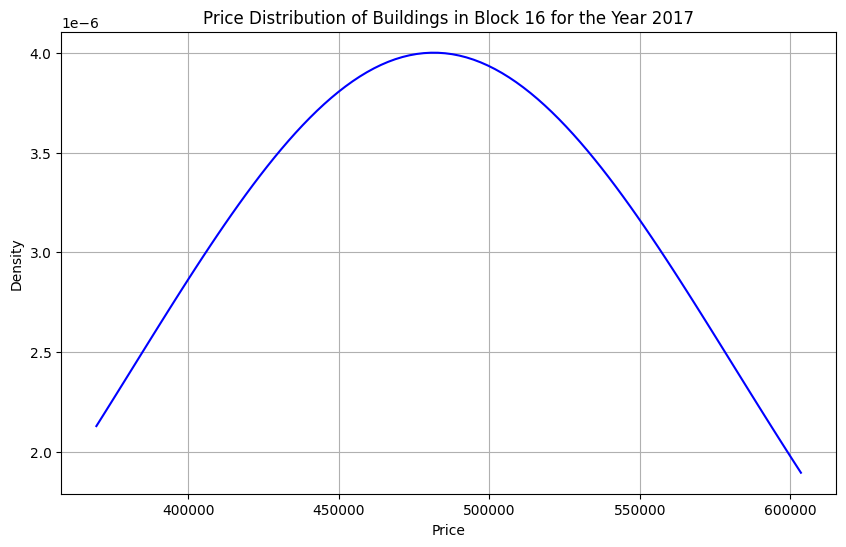

In [ ]:
# Used this to create a bell curve and discovered that there are outliers in price that are messing with certain predictions resulting in negative values
# Negative values originate from the fact that there is data supporting a very low unrealistic price for a given year in a block that messes the prediction for other buildings in the same block
# This was used for testing, this has no effect on the Manhattandf and the df referred here isnt used later
# Information gathered here was used for other code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

df = Manhattandf

block_input = 16
year_input = 2017

# Filter the DataFrame for the specified block and year
filtered_df = df[(df['block'] == block_input) & (df['year'] == year_input)]


prices = filtered_df['fullval'].dropna()  # Drop NaN values

mean = prices.mean()
std = prices.std()

# Generate a range of price values for the bell curve
price_range = np.linspace(prices.min(), prices.max(), 100)

bell_curve = norm.pdf(price_range, mean, std)

print(mean)
print(prices.min())
print(prices.max())

plt.figure(figsize=(10, 6))
plt.plot(price_range, bell_curve, color='blue')
plt.title(f'Price Distribution of Buildings in Block {block_input} for the Year {year_input}')
plt.xlabel('Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [ ]:
#temp


from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# Feature Selection and Engineering
df_combined = Manhattandf

# Removed staddr as we already have boro and block numbers so being further specific will serve little purpose
# features_to_use = ['boro', 'block', 'lot', 'taxclass', 'bldgcl', 'staddr', 'ltfront', 'ltdepth', 'stories']
features_to_use = ['block',  'taxclass', 'bldgcl',  'ltfront', 'ltdepth', 'stories', 'year']
target = 'fullval'

# Data Cleaning
df_combined.dropna(subset=[target], inplace=True)

# Convert categorical features to string
# categorical_features = ['boro', 'taxclass', 'bldgcl', 'staddr']  # Assuming 'staddr' is categorical
categorical_features = ['taxclass', 'bldgcl']
for col in categorical_features:
    df_combined[col] = df_combined[col].astype(str)

# Categorize features
numerical_features = [f for f in features_to_use if f not in categorical_features]

# Preprocessor for handling both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # or 'median'
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)
'''
# Linear Regression Model
# Pipeline with model
# Yielded .44 with 120,000 Values
# Yielded .22 with 240,000 Values
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
'''
'''
# This model takes too long to load
# Random Forest Regressor Model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])
'''


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.3, random_state=42))
])


# Model preparation
X = df_combined[features_to_use]
y = df_combined[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


<ipython-input-88-6ee1c7bb2b06>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.dropna(subset=[target], inplace=True)
<ipython-input-88-6ee1c7bb2b06>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined[col] = df_combined[col].astype(str)


Mean Squared Error: 108184632975999.38
R-squared: 0.7479928419732339


In [ ]:
Manhattandf

,boro,block,lot,easement,year,taxclass,bldgcl,owner,staddr,ltfront,ltdepth,stories,fullval,avland,avtot
6524,1,1841,13,NaN,2021,nan,B3,GARLAND E WOOD,WEST 105 STREET,17.58,75.00,3.0,1107000,66420,175440
8244,1,1841,14,NaN,2021,nan,A5,"NOYES, ELIZABETH",MANHATTAN AVENUE,16.67,75.00,3.0,226000,13560,219780
8323,1,1841,15,NaN,2021,nan,A4,"GOINGS, MATTIE M",MANHATTAN AVENUE,16.33,86.83,3.0,1179000,70740,227580
8477,1,1841,16,NaN,2021,nan,A9,"GLENN GULLICKSON, TIMOTHY",MANHATTAN AVENUE,16.33,86.83,3.0,1782000,106920,256260
9218,1,1841,17,NaN,2021,nan,B9,RAYMOND RECHT,MANHATTAN AVENUE,17.00,70.00,3.0,1611000,96660,219300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398253,1,2225,30,NaN,2018,2,C1,M & N MANAGEMENT CORP,168 SHERMAN AVENUE,50.00,150.00,5.0,1584000,59850,712800
398254,1,2215,356,NaN,2018,1,B1,PONDICHI CONSTANTIN,10 VAN CORLEAR PLACE,28.00,133.00,2.0,655000,23674,34006
398264,1,2202,9,NaN,2018,2,D4,420 WEST 206 STREET O,416 WEST 206 STREET,200.00,99.00,6.0,6011000,193950,2704950
398265,1,2164,44,NaN,2018,2,C7,175 REALTY ASSOCIATES,4316 BROADWAY,37.00,103.00,5.0,2122000,59400,954900


In [ ]:
# The remove_outliers_by_year_block was throwing an error saying year is both a index and a column
# So here i am basically using .reset_index but it wasn't working so i am using this alt method

Manhattandf = pd.DataFrame(Manhattandf.to_dict(orient='list'))

In [ ]:
def remove_outliers_by_year_block(dataframe):
    # Group the DataFrame by 'year' and 'block'
    grouped = dataframe.groupby(['year', 'block'])

    # Function to remove outliers from each group
    def remove_outliers(group):
        q1 = group['fullval'].quantile(0.25)
        q3 = group['fullval'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        return group[(group['fullval'] >= lower_bound) & (group['fullval'] <= upper_bound)]

    # Apply the function to each group and reset the index
    return grouped.apply(remove_outliers)

# Apply the outlier removal function to the entire Manhattan df
Manhattandf = remove_outliers_by_year_block(Manhattandf)


In [ ]:
Manhattandf

boro  block   lot easement  year taxclass bldgcl  \
year block                                                          
2010 64    1162     1     64   106      NaN  2010        4     V1   
     73    1163     1     73    14      NaN  2010        4     Y7   
     120   1164     1    120     9      NaN  2010        3     U1   
     142   1165     1    142    35      NaN  2010        4     W1   
           1166     1    142    30      NaN  2010        4     Q1   
...               ...    ...   ...      ...   ...      ...    ...   
2021 1912  361      1   1912  1105      NaN  2021      nan     R1   
     1914  362      1   1914    40      NaN  2021      nan     V1   
           363      1   1914    41      NaN  2021      nan     C0   
           364      1   1914    55      NaN  2021      nan     C5   
           365      1   1914    56      NaN  2021      nan     C5   

                                 owner            staddr  ltfront  ltdepth  \
year block                                                                   
2010 64    1162  NEW YORK CITY TRANSIT     LIBERTY PLACE     3.00    19.00   
     73    1163  DEPARTMENT OF BUSINES      SOUTH STREET   166.00   140.00   
     120   1164  DEPT OF TRANSPORTATIO  FRANKFORT STREET   216.00   114.00   
     142   1165                    NaN  GREENWICH STREET     0.00     0.00   
           1166  DORMITORY AUTHORITYNY  GREENWICH STREET     0.00     0.00   
...                                ...               ...      ...      ...   
2021 1912  361      BASDEVANT , JEROME      LENOX AVENUE     0.00     0.00   
     1914  362                    DCAS   WEST 130 STREET    16.67    99.92   
           363   RASHID, FAZEELA ABDUL   WEST 130 STREET    16.67    99.92   
           364   STEPHENSON, DEBORAH A   WEST 130 STREET    18.75    99.92   
           365    160 W 130 REALTY LLC   WEST 130 STREET    18.75    99.92   

                 stories   fullval    avland     avtot  
year block                                              
2010 64    1162      NaN     21800      9810      9810  
     73    1163      2.0   3920000   1210500   1764000  
     120   1164      NaN   1400000    630000    630000  
     142   1165      NaN   9488893   1800002   4270002  
           1166      NaN  25000000  11250000  11250000  
...                  ...       ...       ...       ...  
2021 1912  361       5.0      2962      1333     85751  
     1914  362       0.0    672000    302400    302400  
           363       3.0    646000     38760    118440  
           364       3.0     35000     15750    195750  
           365       3.0    213000     95850    241380  

[139607 rows x 15 columns]

481576.25
369509


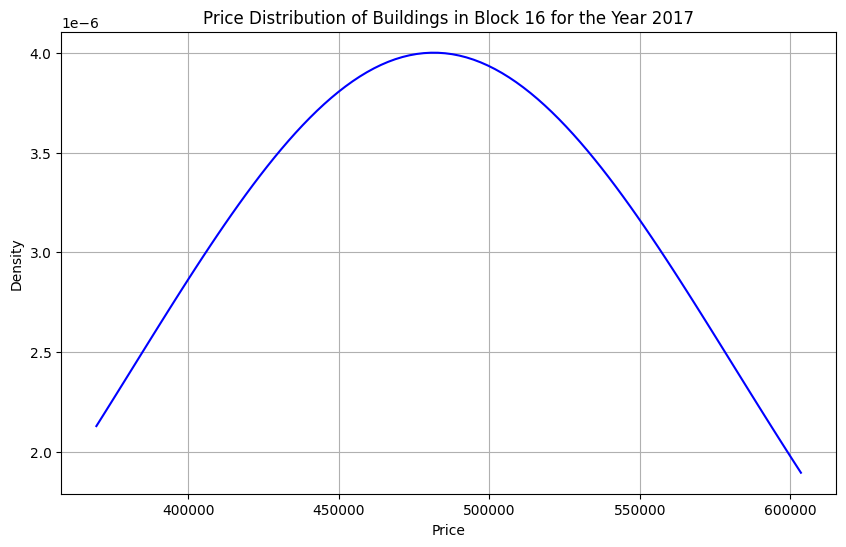

In [ ]:
# Used this to create a bell curve and discovered that there are outliers in price that are messing with certain predictions resulting in negative values
# Negative values originate from the fact that there is data supporting a very low unrealistic price for a given year in a block that messes the prediction for other buildings in the same block
# This was used for testing, this has no effect on the Manhattandf and the df referred here isnt used later
# Information gathered here was used for other code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

df = Manhattandf

block_input = 16
year_input = 2017

# Filter the DataFrame for the specified block and year
filtered_df = df[(df['block'] == block_input) & (df['year'] == year_input)]


prices = filtered_df['fullval'].dropna()  # Drop NaN values

mean = prices.mean()
std = prices.std()
# min = prices.min()

# Generate a range of price values for the bell curve
price_range = np.linspace(prices.min(), prices.max(), 100)

bell_curve = norm.pdf(price_range, mean, std)

print(mean)
print(prices.min())

plt.figure(figsize=(10, 6))
plt.plot(price_range, bell_curve, color='blue')
plt.title(f'Price Distribution of Buildings in Block {block_input} for the Year {year_input}')
plt.xlabel('Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# Feature Selection and Engineering
df_combined = Manhattandf

# Removed staddr as we already have boro and block numbers so being further specific will serve little purpose
# features_to_use = ['boro', 'block', 'lot', 'taxclass', 'bldgcl', 'staddr', 'ltfront', 'ltdepth', 'stories']
features_to_use = ['block',  'taxclass', 'bldgcl',  'ltfront', 'ltdepth', 'stories', 'year']
target = 'fullval'

# Data Cleaning
df_combined.dropna(subset=[target], inplace=True)

# Convert categorical features to string
# categorical_features = ['boro', 'taxclass', 'bldgcl', 'staddr']  # Assuming 'staddr' is categorical
categorical_features = ['taxclass', 'bldgcl']
for col in categorical_features:
    df_combined[col] = df_combined[col].astype(str)

# Categorize features
numerical_features = [f for f in features_to_use if f not in categorical_features]

# Preprocessor for handling both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # or 'median'
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)
'''
# Linear Regression Model
# Pipeline with model
# Yielded .44 with 120,000 Values
# Yielded .22 with 240,000 Values
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
'''
'''
# This model takes too long to load
# Random Forest Regressor Model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])
'''


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.3, random_state=42))
])


# Model preparation
X = df_combined[features_to_use]
y = df_combined[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 69416622146159.26
R-squared: 0.7917212784790276


In [ ]:
# Ask user for input and output cost prediction

# Function to handle "N/A" input and convert it to None (which pandas interprets as np.nan)
def get_input(prompt, input_type=str):
    user_input = input(prompt)
    if user_input.lower() == 'n/a':
        return None
    return input_type(user_input)

block =   get_input("Enter the block number (or N/A if unknown): ", int)
taxclass =get_input("Enter the tax class (or N/A if unknown): ")
bldgcl =  get_input("Enter the building class (or N/A if unknown): ")
ltfront = get_input("Enter the lot frontage (or N/A if unknown): ", float)
ltdepth = get_input("Enter the lot depth (or N/A if unknown): ", float)
stories = get_input("Enter the number of stories (or N/A if unknown): ", int)


KeyboardInterrupt: Interrupted by user

In [ ]:
'''
year = 2018
street_name = "1 RIVER TERRACE"
block = 16
lot_num = 3859
fullval = 354180
taxclass = 2
building class = R4
stores = 31
'''

In [ ]:
year =    get_input("Enter the year of purchase (or N/A if unknown): ", int)

user_input = pd.DataFrame({
    'block': [block],
    'taxclass': [taxclass],
    'bldgcl': [bldgcl],
    'ltfront': [ltfront],
    'ltdepth': [ltdepth],
    'stories': [stories],
    'year': [year]
})

# Check if user_input contains None, replace it with np.nan
user_input = user_input.where(pd.notnull(user_input), None)

predicted_value = pipeline.predict(user_input)

print(f"The predicted value of the building is: ${predicted_value[0]:,.2f}" if predicted_value[0] is not None else "Insufficient data to make a prediction.")


In [ ]:
print(predicted_value)

In [ ]:
print("To provide more accurate predictions and graphs, please provide the following extraneous metrics")
lot_num  =       get_input("Enter the lot number (or N/A if unknown): ", int)
street_name =    get_input("Enter the street_name (or N/A if unknown): ")


In [ ]:
# Create empty dict of desired years use for processing

cost_against_year = {}

# Store ranges of years to implement in graphical displays
for yeardecrement in range(8, 1, -1):
  cost_against_year[year - yeardecrement] = 0

cost_against_year[year] = 0

for yearincrement in range(1, 5):
  cost_against_year[year + yearincrement] = 0



print(cost_against_year)


In [ ]:
# Loop through df to look for any existing values to base graphs off of rather than generating estimates using model
# Then populate the rest of the years with predictions
'''
existing_entries_year = []

for index, row in df4.iterrows():
    if row['year'] in cost_against_year and row['staddr'] == street_name and row['lot'] == lot_num and row['block'] == block:
        cost_against_year[row['year']] += row['fullval']
        existing_entries_year.append(row['year'])
'''

In [ ]:
for key, value in cost_against_year.items():
  print(value)
  if value == 0:
    prediction_year_df = pd.DataFrame({
    'block': [block],
    'taxclass': [taxclass],
    'bldgcl': [bldgcl],
    'ltfront': [ltfront],
    'ltdepth': [ltdepth],
    'stories': [stories],
    'year': [key]
    })
    prediction_year_df.where(pd.notnull(user_input), None)

    predicition_year = pipeline.predict(prediction_year_df)
    print(key, "year")
    print(predicition_year)
    cost_against_year[key] = predicition_year[0]

In [ ]:
print(cost_against_year)

In [ ]:
# Heatmap of high profit and low profit areas red adn blue
# Genrerate change of cost over the years
# Line graphs of price change
# Use gpt to update with real time events and produce a better humanlike itnerface